In [114]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import linear_model, preprocessing, model_selection, metrics
%matplotlib inline

In [3]:
df = pd.read_csv("/data/insurance.csv")

In [4]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
gender      1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [6]:
target = "charges"

In [8]:
X = df.iloc[:, :-1]
X.head()

,age,gender,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [10]:
y = df[target]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [16]:
# One Hot Encoding
X_oh = pd.get_dummies(X, drop_first=True)
X_oh.head()

,age,bmi,children,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [20]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_oh, 
                                y, test_size = 0.3, random_state = 1)

In [74]:
np.random.seed(135)
np.random.random(10)

array([0.66132894, 0.3276947 , 0.19539818, 0.86298231, 0.78213226,
       0.157542  , 0.52060568, 0.96395562, 0.05255595, 0.93026357])

In [80]:
# Find Z-score for each feature columns
# Z = (X - X.mean)/Std_x -> done column wise
scaler = preprocessing.StandardScaler()
scaler.fit(X_train) # find mean and sd for each column
X_train_std = scaler.transform(X_train) # Applying sd and mean to calculate Z for each column
X_test_std = scaler.transform(X_test)
pd.DataFrame(X_train_std) #converting to dataframe ONLY for display 

,0,1,2,3,4,5,6,7
0,0.797152,-0.702114,-0.904002,0.976766,-0.509664,1.788102,-0.600387,-0.587220
1,-1.271085,-0.703758,-0.085679,-1.023787,-0.509664,-0.559252,-0.600387,1.702939
2,-0.985811,-0.733340,-0.904002,0.976766,-0.509664,-0.559252,-0.600387,-0.587220
3,0.797152,-0.414510,1.550967,-1.023787,-0.509664,-0.559252,1.665591,-0.587220
4,0.868471,1.482037,-0.085679,0.976766,-0.509664,-0.559252,-0.600387,1.702939
5,-0.985811,1.749098,-0.904002,-1.023787,-0.509664,-0.559252,-0.600387,-0.587220
6,-0.843174,0.117970,-0.904002,-1.023787,1.962076,-0.559252,-0.600387,1.702939
7,1.724293,-0.608437,-0.904002,-1.023787,1.962076,1.788102,-0.600387,-0.587220
8,-1.485041,0.525546,-0.904002,-1.023787,-0.509664,-0.559252,1.665591,-0.587220
9,-1.485041,-1.248563,-0.904002,0.976766,-0.509664,-0.559252,-0.600387,-0.587220


In [97]:
est = linear_model.LinearRegression()
est.fit(X_train_std, y_train)
y_train_pred = est.predict(X_train_std)
y_test_pred = est.predict(X_test_std)

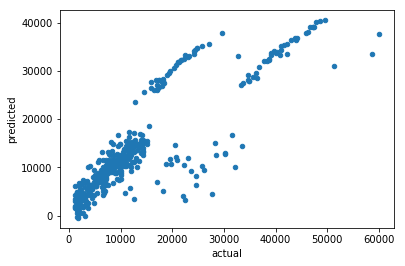

In [98]:
summary = pd.DataFrame({"actual": y_test
        , "predicted": y_test_pred})
summary.plot.scatter(0, 1)

In [99]:
summary["error"] = summary.actual - summary.predicted

In [100]:
summary.head()

,actual,predicted,error
559,1646.4297,4610.315541,-2963.885841
1087,11353.2276,12887.893880,-1534.666280
1020,8798.5930,12573.948752,-3775.355752
460,10381.4787,13197.836626,-2816.357926
802,2103.0800,629.337182,1473.742818


(array([-15000., -10000.,  -5000.,      0.,   5000.,  10000.,  15000.,
         20000.,  25000.,  30000.]), <a list of 10 Text xticklabel objects>)

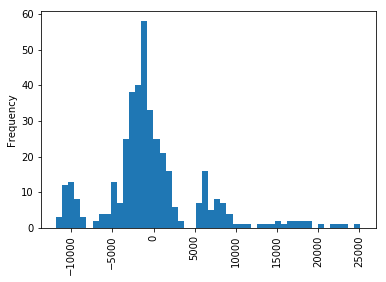

In [101]:
summary.error.plot.hist(bins = 50)
plt.xticks(rotation = 90)

In [103]:
# sum of squared error 
sse = np.sum(summary.error ** 2)
sse

14778105453.509336

In [105]:
y_train_mean = np.mean(y_train) # baseline estimation

In [106]:
# sum of squared total
sst = np.sum((y_test - y_train_mean) ** 2)

In [107]:
"""
A. r < 0 cannot be true because of the sqare terms
B. r : 0 to 1 This is expected
C. r > 1 if sse > sst, then there is no point of using a ML model

"""

sse / sst 


0.2594002695488974

In [108]:
r2 = 1 - sse / sst 
# This r2 score gives goodness measure of the model

In [109]:
r2

0.7405997304511026

In [112]:
mse = sse / len(y_test) # mean squared error
mse

36761456.352013275

In [113]:
rmse = np.sqrt(mse ) #root mean squared error
rmse

6063.122656850452

In [115]:
# MSE lower is better
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
mse_train/mse_test # Expection is that this ratio should be <1 
# Because the model has seen the training data before

0.9922564115746513

In [119]:
target = "charges"
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)
y = df[target]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                            , test_size = 0.3, random_state = 123)

est = linear_model.LinearRegression()
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print("R2_train: %f, \nR2_test: %f\nrmse train: %f\nrmse_test: %f" 
      % (r2_train, r2_test, rmse_train, rmse_test))

R2_train: 0.745579, 
R2_test: 0.762758
rmse train: 6138.755591
rmse_test: 5821.713418
